In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import os
os.chdir("C:\\Users\\olya\\Downloads\\student")

In [3]:
df = pd.read_csv('StudentsPerformance.csv', sep=",", header = 0, index_col=False)

In [4]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.insert(8,"sr",0)

In [6]:
df['sr']=((df['math score']+df['reading score']+df['writing score'])/3)

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sr
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<AxesSubplot:>

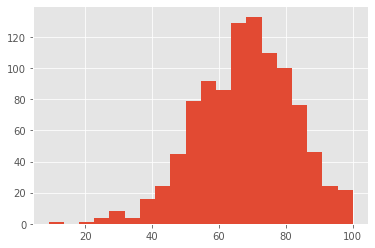

In [8]:
df['sr'].hist(bins=20)

In [9]:
res = stats.shapiro(df['sr'])
print('p-value: ', res[1])

p-value:  0.00014498003292828798


In [10]:
min=df['sr'].min()
min

9.0

In [43]:
dftemp=df.drop(df[df['sr'] <=min].index)

<AxesSubplot:>

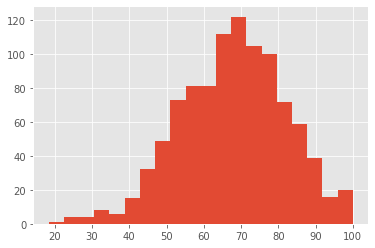

In [97]:
dftemp['sr'].hist(bins=20)

In [98]:
res = stats.shapiro(dftemp['sr'])
print('p-value: ', res[1])

p-value:  0.0008361880900338292


In [136]:
x = df[df['gender'] == 'male']['sr']
y = df[df['gender'] == 'female']['sr']
x.name, y.name = 'male', 'female'

In [137]:
def two_histograms(x, y):
    
    x.hist(alpha=0.5)
    y.hist(alpha=0.5)
    plt.axvline(x.median(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.median(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

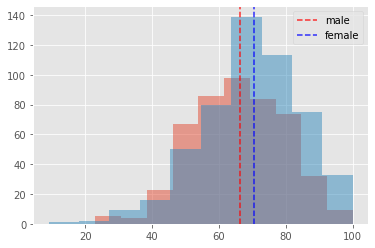

In [138]:
two_histograms(x, y)

In [139]:
res = stats.shapiro(y)
print('p-value: ', res[1])

p-value:  6.0721460613422096e-05


In [140]:
res = stats.shapiro(x)
print('p-value: ', res[1])

p-value:  0.0576900988817215


In [141]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.753856198738966


In [142]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  3.311973638243664e-05


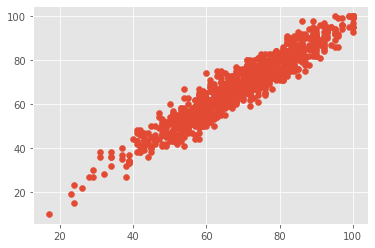

In [273]:
plt.scatter(df['reading score'], df['writing score'])

In [274]:
res = stats.pearsonr(df['reading score'], df['writing score'])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.9545980771462477
p-value:  0.0


In [130]:
pk = pd.read_csv('NetflixOriginals.csv', sep=",", header = 0, index_col=False)

In [131]:
pk

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [160]:
x = pk[pk['Genre'] == 'Drama']['IMDB Score']
y = pk[pk['Genre'] != 'Drama']['IMDB Score']
x.name, y.name = 'drama', 'not drama'

In [161]:
def two_histograms(x, y):
    
    x.hist(alpha=0.5)
    y.hist(alpha=0.5)
    plt.axvline(x.median(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.median(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

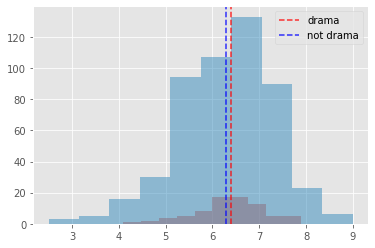

In [162]:
two_histograms(x, y)

In [164]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.6088537624756013


In [165]:
x = pk[pk['Genre'] == 'Comedy']['IMDB Score']
y = pk[pk['Genre'] != 'Comedy']['IMDB Score']
x.name, y.name = 'comedy', 'not comedy'

In [166]:
def two_histograms(x, y):
    
    x.hist(alpha=0.5)
    y.hist(alpha=0.5)
    plt.axvline(x.median(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.median(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

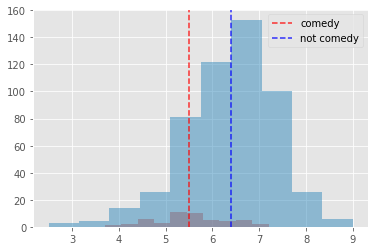

In [167]:
two_histograms(x, y)

In [168]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 1.1539162576975409e-09


In [249]:
wp= pd.read_excel('Worker_Performance.xls', header = 0, index_col=False)

In [263]:
chunks = np.array_split(wp, 2)
bef=chunks[0]
af=chunks[1]

In [264]:
af.index=(range(len(af)))

In [265]:
bef['p_after']=af[af['Participant']==bef['Participant']]['Performance']
bef

,Participant,BeforeAfter,Task,Performance,p_after
0,1,0,0,0.60,0.42
1,2,0,0,0.50,0.61
2,3,0,0,0.70,0.71
3,4,0,0,0.60,0.51
4,5,0,0,0.70,0.61
5,6,0,0,0.70,0.32
6,7,0,0,0.30,0.71
7,8,0,0,0.50,0.32
8,9,0,0,0.30,0.31
9,10,0,0,0.40,0.52


In [270]:
x = bef['Performance']
y = bef['p_after']
x.name, y.name = 'Before', 'After'

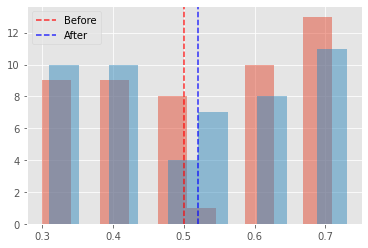

In [271]:
two_histograms(x, y)

In [272]:
res=stats.wilcoxon(x,y)
print('p-value:', res[1])

p-value: 0.670867901158691
